<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/5%EC%A3%BC%EC%B0%A8/R4ds_2(2021_10_05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R for Data Science 실습 2 - Data wrangling and programing

## Data Wrangling (tidyr)

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [5]:
table4a # N. cases #하나의 variable이 2개로 나뉘어져 있다.

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [6]:
table4b # N. population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


* table들을 실행시켜준다.

## pivot_longer() 

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [7]:
table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
#두개를 합쳐주고 싶으면 c('1999', '2000')이렇게 적어주고, names_to 해서 이름을 적어주고 values_to해서 값을 적어준다.

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [8]:
table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
#table4b와 같은 경우도 values_to를 만들어주면 table이 정리 된것을 볼 수 있다.

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [9]:
tidy4a <- table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)
#left_join을 사용해서 tidy4b를 tidy4a에 붙여준다.

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try ?right_join and study join methods

# 교수님이 join method는 **꼭** 공부해보라고 하심.
* 'inner_join()' : includes all rows in 'x' and 'y'.
* 'left_join()' : includes all rows in 'x'.
* 'right_join()' : includes all rows in 'y'.
* 'full_join()' : includes all rows in 'x' or 'y'.

## Pivot_wider()

One observation might be scattered across multiple rows

* 우리가 사용할 데이터는 table2의 데이터이다.
* Afghanistan을 보았을 때, cases와 population이 두개로 나뉘어 져서 저장이되어 있는 것을 볼 수 있다.

In [10]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [11]:
table2 %>% pivot_wider(names_from = type, values_from = count)
#새로만들어지는 names_from을 type에서 가지고 온다라는 것이고, values_from을 count에서 가지고 온다는 것이다.

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separating and Uniting 

## separate()

One column contains two variables 

* 하나의 열에 두개의 변수가 있는 경우이다.

In [12]:
table3 

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [13]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


* 위에서의 문제점은 cases와 population을 나눠주게 되면, chr이 되기 때문에 분석을 할때는 이 부분을 바꾸어 주어야 한다.

In [14]:
table3 %>% separate(rate, into = c("cases", "population")) %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<int>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


* 그래서 mutate와 as.numeric을 사용해서 chr를 dbl로 바꾸어 주었다.

In [15]:
table3 %>% separate(rate, into = c("cases", "population"), sep="[^[:alnum:]]+")
#이게 regular expression이다.->[^[:alnum:]]+ 이게 all numeric이 아닌거를 말한다.
#즉, 이 말은 알파벳과 숫자가 아닌 것을 찾는다는 말이다.

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


# 관심있는 학생들은 regular expression을 공부해보는 것도 좋다고 하심.

## unite()

Single variable is spread across multiple columns

* century와 year이 두개로 나누어져 있다.

In [16]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [17]:
table5 %>% 
  unite(new, century, year, sep = "")
# new라는 변수를 하나 만들어서 century와 year를 합쳐준다.
#그리고 합칠 때, 그 사이의 간격이 없이 합쳐라 하는게 sep = ""이다.

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


# Functional Programming

* 먼저 dataframe으로 a,b,c,d를 만들어 준다.

In [18]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [19]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.1149168,0.73700951,0.28922061,-0.6922508
0.1596923,1.61571965,1.62008041,-0.4390480
0.2868910,0.62490819,-0.08159299,0.6323252
1.4819786,0.50350373,1.19377086,-0.8157904
1.6357063,-0.54712757,-0.30375980,0.5859157
-0.5050720,-0.88980600,-0.28094776,0.3553662
-0.3155813,-0.92158619,0.98885832,1.2613526
-0.2574425,0.05950138,0.01995635,0.5527673
0.2707823,-0.97926970,-0.20430722,-0.4137151


* a,b,c,d로 정규분포에서 생성된 난수들로 생성된것을 볼 수 있다.

In [20]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] -0.04830553

[1] 0.2815026

[1] 0.1545885

[1] -0.02917445

Don't copy and paste multiple times  
You can iterate using for loops


* 그래서 For loops으로 코딩을 하는게 좀 더 효율적이다.

In [21]:
output <- vector("double", ncol(df))  # 1. output
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1] -0.04830553  0.28150255  0.15458848 -0.02917445

In [22]:
output <- c()  #이렇게 공간을 잡아 놓지 않고 For loops를 돌려주게 되면 비효율적이라고 말씀하심.
output


NULL

In [23]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1] -0.04830553  0.28150255  0.15458848 -0.02917445

In [24]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:

simple1 <- function(n) {
  output <- vector("double", n)  #공간을 잡아놓은 경우.
  for(i in 1:n) 
    output[i] = i
  return(output)
} 

simple2 <- function(n) {
  output <- c()  #공간을 잡아 놓지 않은 경우.
  for(i in 1:n) 
    output = c(output, i)
  return(output)
} 


In [26]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [27]:
simple2(10)

[1]  1  2  3  4  5  6  7  8  9 10

* 숫자가 적을 때는 공간을 잡아놓은 것과 안 잡아 놓은게 차이가 없지만 숫자가 커지게 되면 benchmark로 보았을 때, 차이가 나는 것을 볼 수 있다.

In [28]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,   #100번씩 replications을 해주게 된다.
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.235,100


* fc1은 시간이 소모되는게 0.006이라면, fc2는 시간이 소모되는게 0.201이라는 것을 알 수 있다.

* 그래서 공간을 미리 할당 해 놓는게 동적으로 잡는 것 보다는 보다 더 빠르다는 것을 알 수 있다.

In [29]:
226/6


[1] 37.66667

## for_loops vs functional

Possible to wrap up for loops in a function


* 함수 안에서 For loops을 담는 방법이다.

In [30]:
col_mean <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] 0.1385734 0.1535827 0.3769213 0.0044891

You can make function as a variable

* function을 variable로 잡아서 하는 방법이 있다.

In [31]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1] -0.04830553  0.28150255  0.15458848 -0.02917445

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [32]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] -1.115 0.16 0.287 1.482 1.636 ...
 $ b: num [1:10] 0.737 1.616 0.625 0.504 -0.547 ...
 $ c: num [1:10] 0.2892 1.6201 -0.0816 1.1938 -0.3038 ...
 $ d: num [1:10] -0.692 -0.439 0.632 -0.816 0.586 ...


In [33]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.1149168,0.73700951,0.28922061,-0.6922508
0.1596923,1.61571965,1.62008041,-0.4390480
0.2868910,0.62490819,-0.08159299,0.6323252
1.4819786,0.50350373,1.19377086,-0.8157904
1.6357063,-0.54712757,-0.30375980,0.5859157
-0.5050720,-0.88980600,-0.28094776,0.3553662
-0.3155813,-0.92158619,0.98885832,1.2613526
-0.2574425,0.05950138,0.01995635,0.5527673
0.2707823,-0.97926970,-0.20430722,-0.4137151


In [34]:
df %>% map_dbl(mean)

a         b         c         d 
0.1385734 0.1535827 0.3769213 0.0044891

* 결과들이 numeric vector들로 나열이 되어 있는 것을 볼 수 있다.

In [35]:
df %>% map(mean)

$a
[1] 0.1385734

$b
[1] 0.1535827

$c
[1] 0.3769213

$d
[1] 0.0044891

* 일반적으로 map(mean)을 사용하게 되면, list형태로 나열이 되는 것을 알 수 있다.

In [36]:
df %>% map_dbl(median)

a           b           c           d 
-0.04830553  0.28150255  0.15458848 -0.02917445

In [37]:
mtcars 
#mtcars는 자동차에 대한 데이터가 있는 것으 볼 수 있다.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [38]:
mtcars %>% 
  split(.$cyl)
#mtcars에서 cyl로 split을 해주게 되면, cyl로 나뉘어 지는 것을 알 수 있다.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [39]:
#먼저 함수function을 정의해주고
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}

#split한 것을 f1에 집어넣어 주는 방식이다.
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [40]:
#근데 위에서 처럼 함수 function을 다른 곳에서 정의해서 써주는 방식이 아니라
#map안에서 function을 정해서 사용해주는 방법도 있다.
mtcars %>% 
  split(.$cyl) %>% 
  map(function(df) lm(mpg ~ wt, data = df))


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [41]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [42]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .))
#이 방법 처럼 ~를 해준 다음에 데이터가 들어갈 장소에는 .을 해주는 방법도 있다.

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [43]:
df %>% map_dbl(mean)

a         b         c         d 
0.1385734 0.1535827 0.3769213 0.0044891

In [45]:
df %>% map_dbl(~mean(.))
#mean이란 함수에 .안의 데이터를 사용해라 하는 것이다.
# ~표시하고 .을 한 방법이 위에 적어 놓은 코드랑 비슷하다는 것을 알 수 있다.

a         b         c         d 
0.1385734 0.1535827 0.3769213 0.0044891

## Extract Component

In [49]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) 
#이렇게 하면 cyl더 별로 lm돌린거의 summary가 정리 된 것을 볼 수 있다.

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [50]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl(~.$r.squared)
#summary에서 r.squared를 추출하고 싶은 것이다.

4         6         8 
0.5086326 0.4645102 0.4229655

In [51]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl('r.squared') #이렇게 변수명을 호출해줘서 뽑아내주는 방법도 있다.


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

* 위치 정보를 쳤을 때도 위치의 값을 뽑아 내 준다는 것을 알 수 있다.

In [52]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

In [53]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it. 

Is it fater as well? 

* 교수님이 For loops한게 것보다 Functional Programming을 한게 더 빠를지 한 번 해본 것이다.

In [54]:
n_len = 10

In [56]:
rep(10,n_len)  #10개의 10으로 구성된 벡터를 만들었다.

[1] 10 10 10 10 10 10 10 10 10 10

In [58]:
rep(10,n_len) %>% map(rnorm) #그럼 각각의 component들이 rnorm안에 들어가게 끔해준다.

[[1]]
 [1]  1.66282509  0.01704551  0.84051541 -0.18611042 -0.86303641 -1.26368323
 [7] -0.15024119  0.31233344 -0.02018177  1.20957938

[[2]]
 [1] -0.7839183  0.5410778 -0.2260821  1.1563950 -1.4840100 -0.8804993
 [7]  0.6389171  0.6213816  0.5401821  0.8915710

[[3]]
 [1] -0.76764966  0.65222224 -0.07781688  0.88271481  1.21663228 -2.19661148
 [7] -1.05809389  1.58665211  1.18580819 -0.87857972

[[4]]
 [1] -1.52926502 -1.03634025 -0.12228215 -0.05940843  0.32694250 -1.02834775
 [7]  0.47588008  0.15318225  0.64802492  0.25456471

[[5]]
 [1] -0.5769586  0.6020762  1.1588205  0.6101963  0.0932806 -0.9262602
 [7]  0.2456140  1.7813860  0.9414648 -1.9754795

[[6]]
 [1] -0.11105670 -0.41487467  0.15402846  0.27482986  0.03701569 -1.45869258
 [7]  1.00847092 -0.74895446 -0.87805632 -1.21055167

[[7]]
 [1] -1.2083745 -0.6556161  1.3734715  1.3073686  0.5197406  0.1976377
 [7]  0.9914669 -0.2692311 -0.4275729 -2.1187283

[[8]]
 [1]  0.3006980 -0.7893660  1.1342872  0.8779047  0.8421333 -0.5618742
 [7]  1.1989194 -0.9706144  0.5046252 -0.1702140

[[9]]
 [1] -2.82410460 -0.60091624  1.04351663  0.52045573  0.09441746 -1.22058357
 [7] -0.94680526  0.68170895 -1.38054538  0.89327917

[[10]]
 [1] -0.34296604 -0.71262141  0.82603310  0.28265541 -0.03022453  1.57519136
 [7]  0.41042073 -0.29617459  0.13375783  0.08827983

In [59]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1]  0.05710477 -0.37673293 -1.46164499 -2.03576031  0.16389699 -1.34927852
 [7]  0.28514780  2.38691377  0.10901002  1.01735191

[[2]]
 [1]  0.51576243  0.63500414  0.75215068  0.71921397  1.15423854  0.12223145
 [7] -0.78008538  0.08724821 -2.20240362  0.41030863

[[3]]
 [1] -0.23197185  0.95813540 -0.09925537 -1.18675592 -0.38574642  0.68409227
 [7] -2.20162588 -0.15956516  0.20756281 -0.09740241

[[4]]
 [1] -1.83322690 -0.76202033  1.53045867 -1.41879734  1.70539686  0.67788307
 [7]  0.14080749 -0.34049972 -0.47271463 -0.02067511

[[5]]
 [1]  2.1621916 -0.6478684  0.4160135 -0.6375187 -2.0301579 -0.3433643
 [7] -1.7241049  0.3710559 -0.8996827 -0.7149530

[[6]]
 [1] -0.7755451 -2.0246219  0.1909950  0.4862494  0.2296194 -0.7939274
 [7]  0.7432021 -0.5727839  0.5291990  0.3014336

[[7]]
 [1]  2.47829378 -2.00725485  0.08298868 -1.26885695  0.32524249  0.28834729
 [7] -0.08396273 -0.16813474  1.63208565 -0.07706937

[[8]]
 [1] -0.6764534  0.3409661 -0.7067211  0.4046803 -0.4762959  0.6583084
 [7]  0.7654871  1.0603799 -1.0863341 -1.1839695

[[9]]
 [1]  0.51231596  0.39793137 -0.04394256  0.36547447  1.27181086 -1.17105878
 [7]  0.58953141  0.49504978 -1.15271711 -0.09545879

[[10]]
 [1] -0.12654988  0.84369404 -0.03705415 -2.21130035  0.67225198 -0.28403916
 [7] -0.60824001  0.10003813 -0.52204487 -1.76962983

In [61]:
lapply(rep(10,n_len), rnorm )

#R에서 사용되는 방식인 lapply를 사용할 수 도 있다.

[[1]]
 [1] -0.57174933  0.02464845  0.82758728 -1.35325765 -0.45639975  0.96041714
 [7]  0.33648774 -1.05417252 -0.14050616 -1.07142329

[[2]]
 [1] -0.12736001 -0.92332134  0.08907870 -0.15701817 -0.18108937 -1.43083959
 [7]  0.04747896 -0.04280223 -0.23345019  0.33914631

[[3]]
 [1] -1.10390724 -0.06770847 -0.26350907  0.58999115 -0.28694106  0.08606768
 [7] -1.67150569 -0.79823694 -0.58235141  0.58277979

[[4]]
 [1] -0.4751649 -2.0424060 -1.5645243  0.2685845 -0.2764699  0.1626082
 [7]  0.1797918 -0.7538525 -1.8197752 -0.1063045

[[5]]
 [1]  0.1332766  0.9377062  0.8916240  0.1399017 -0.2874317  0.5328425
 [7] -1.1407726  1.5292620 -1.4377679 -0.8169198

[[6]]
 [1]  2.0011658  0.4379915  0.2528272  1.7774620 -0.2762564 -0.2209705
 [7]  0.4260110  2.2461958  0.2238807  0.4162437

[[7]]
 [1]  2.15874957 -0.82493913 -1.66092491 -0.75526322  0.30950222  0.04719348
 [7] -1.08904393  0.26722786  0.36234440  0.75095896

[[8]]
 [1] -0.14068125  1.78716552 -0.29508155  0.25956390  1.02554893 -0.52595810
 [7] -0.49514171  1.84055905 -0.08852505 -0.55932649

[[9]]
 [1]  1.8220661 -0.6828276 -0.3761385 -1.2425528 -2.1783634 -0.4061383
 [7] -0.1234966  0.3929849 -0.4183029 -0.1374287

[[10]]
 [1] -0.01622392 -0.07128564  0.72988475  0.15883711 -0.38069121 -1.12536089
 [7] -2.07410712 -0.03894176  0.41356551  0.52298699

In [62]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(rnorm)
}

In [63]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [64]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [65]:
gen2(10)

[[1]]
 [1] -1.15373875  0.04060893 -0.79203966  0.41483334 -1.06348947 -0.08486526
 [7] -0.74937132 -0.93783187  1.38738168 -0.50185382

[[2]]
 [1] -0.08491451 -0.07728895 -0.68117248 -0.36883039 -0.33508513  0.43615242
 [7]  1.23538210 -1.18814129 -0.68485929  0.09032343

[[3]]
 [1] -1.8878565  1.6014565  0.3707274  0.9365352 -0.2445500 -1.2237834
 [7]  0.9302131 -0.1472620 -1.0779419  1.4337998

[[4]]
 [1] -0.49169118 -1.27062701 -2.32463265 -1.07568530  0.03497297  0.40120533
 [7]  1.15252675 -0.44454898  0.58091578  0.76973722

[[5]]
 [1] -0.9494507  1.3409599 -0.3429508 -0.5477073 -0.7458412 -0.7992562
 [7] -0.6989674  1.0116070 -0.7443938  0.4890060

[[6]]
 [1]  1.23882603 -0.16969228 -0.31337051  0.08540117  1.02416359 -0.45150425
 [7]  0.21535732 -0.11999179 -1.30600216  1.37594560

[[7]]
 [1]  0.35154223 -0.08037482  1.44880218  1.79382024  0.74843063 -0.02979047
 [7]  0.59156696  0.91504914  0.40286071 -0.57902268

[[8]]
 [1] -0.3422884  0.5806711 -0.8952178 -0.8287652 -0.6891488  3.1385312
 [7] -1.9631573 -0.6569269  1.7658763  0.3486911

[[9]]
 [1] -1.3090983 -0.4363487  0.2758729  1.0510527  0.5153836 -0.2252764
 [7]  1.5360875 -0.6317738  0.4060425 -0.1245892

[[10]]
 [1] -1.0042190  0.1667969 -0.1480216  0.9464296 -0.9173207  0.1014246
 [7] -0.1785079  0.3031137 -0.4224146  0.2458516

In [66]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.439,100
2,fc2,0.356,100
3,fc3,0.389,100


* functional같은 경우는 속도 면에서는 차이가 없지만 사용하기는 간단하게 되어 있다.

# Something useful

In [67]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


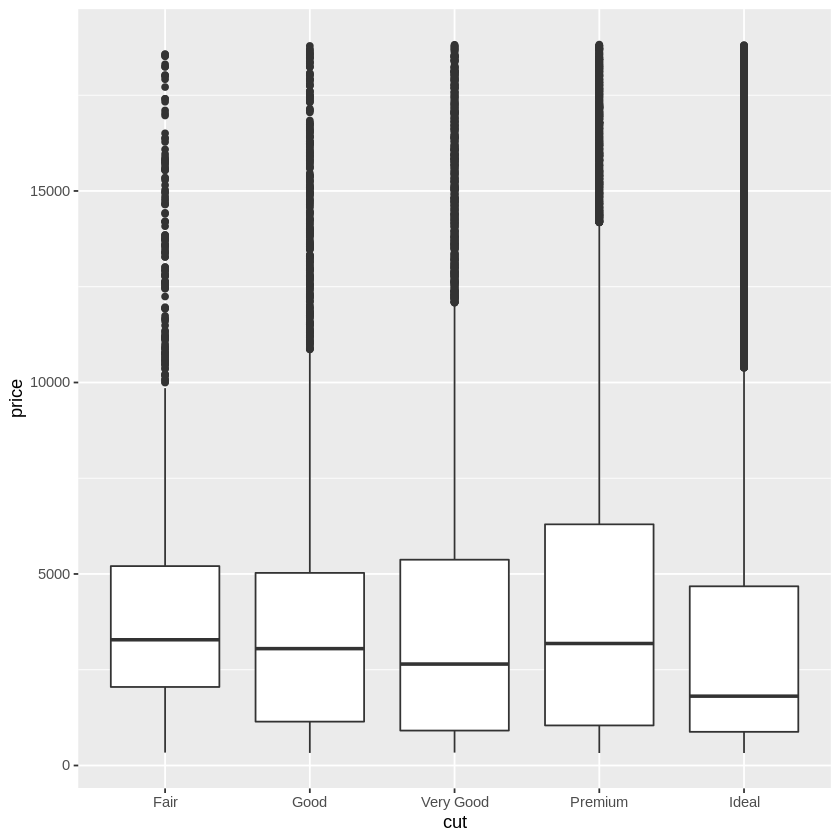

In [68]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

* 가격과 같은 경우는 치우쳐져 있는 경우가 많아서 그럴 경우는 box-plot보다는 violin-plot을 사용하는게 더 효과적이다.

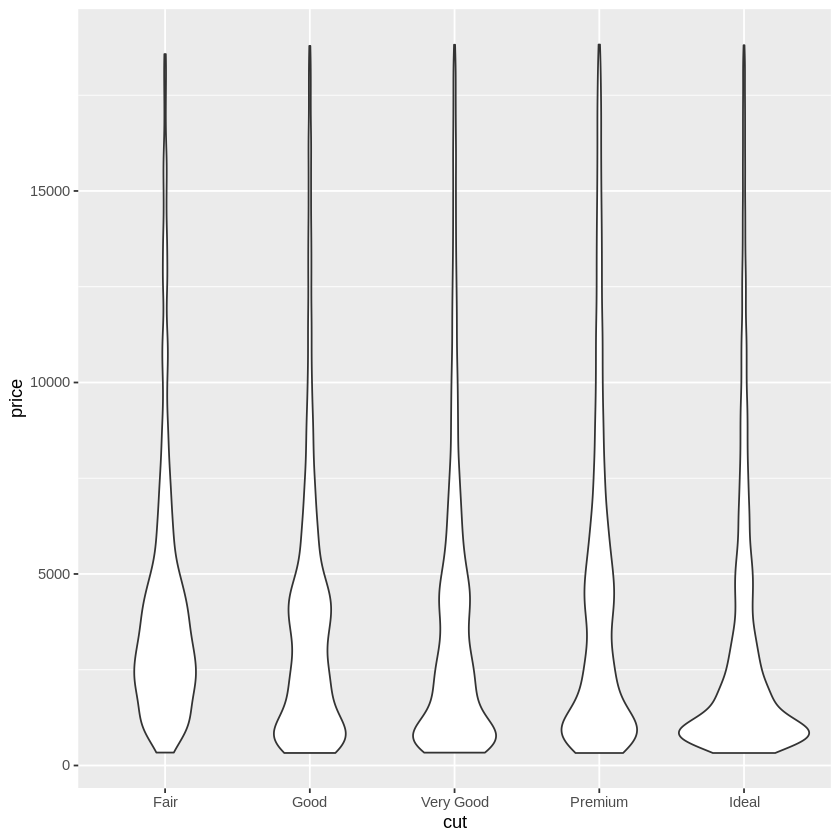

In [69]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() 

* violin-plot만 그러주기 좀 그럴 때는 violin-plot안에 box-plot을 넣어 주는 경우도 있다.

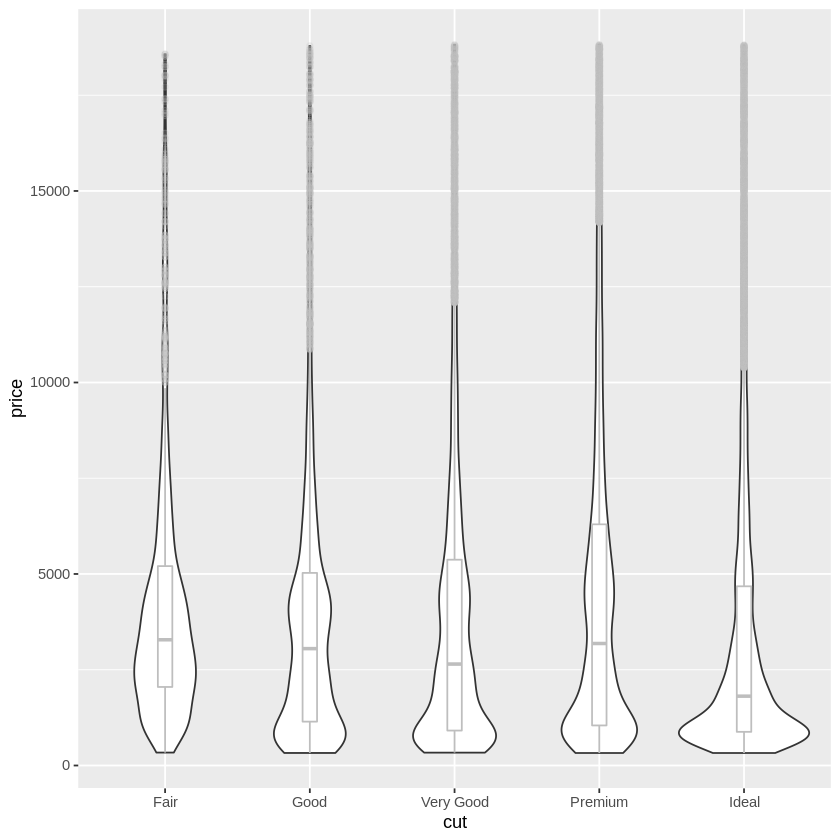

In [70]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)  